In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cufflinks as cf
import pandas_datareader.data as web
import datetime as dt

cf.set_config_file(offline = True)

In [110]:
# Get all focused stocks
symbol = ["AAPL", "BTC-USD", "FB", "GOOG", "MSFT", "TSLA"]
start = dt.date(2021, 1, 1)
end = dt.date(2021, 12, 31)

stocks = web.DataReader(symbol, "yahoo", start, end)
stocks

Attributes   Adj Close                                                     \
Symbols           AAPL       BTC-USD          FB         GOOG        MSFT   
Date                                                                        
2021-01-01         NaN  29374.152344         NaN          NaN         NaN   
2021-01-02         NaN  32127.267578         NaN          NaN         NaN   
2021-01-03         NaN  32782.023438         NaN          NaN         NaN   
2021-01-04  128.453461  31971.914062  268.940002  1728.239990  215.434967   
2021-01-05  130.041611  33992.429688  270.970001  1740.920044  215.642792   
...                ...           ...         ...          ...         ...   
2021-12-28  179.061859  47588.855469  346.220001  2928.959961  340.545837   
2021-12-29  179.151749  46444.710938  342.940002  2930.090088  341.244415   
2021-12-30  177.973251  47178.125000  344.359985  2920.050049  338.619843   
2021-12-31  177.344055  46306.445312  336.350006  2893.590088  335.626038   
2022-01-01         NaN  47686.812500         NaN          NaN         NaN   

Attributes                    Close                                         \
Symbols            TSLA        AAPL       BTC-USD          FB         GOOG   
Date                                                                         
2021-01-01          NaN         NaN  29374.152344         NaN          NaN   
2021-01-02          NaN         NaN  32127.267578         NaN          NaN   
2021-01-03          NaN         NaN  32782.023438         NaN          NaN   
2021-01-04   729.770020  129.410004  31971.914062  268.940002  1728.239990   
2021-01-05   735.109985  131.009995  33992.429688  270.970001  1740.920044   
...                 ...         ...           ...         ...          ...   
2021-12-28  1088.469971  179.289993  47588.855469  346.220001  2928.959961   
2021-12-29  1086.189941  179.380005  46444.710938  342.940002  2930.090088   
2021-12-30  1070.339966  178.199997  47178.125000  344.359985  2920.050049   
2021-12-31  1056.780029  177.570007  46306.445312  336.350006  2893.590088   
2022-01-01          NaN         NaN  47686.812500         NaN          NaN   

Attributes  ...        Open                                        \
Symbols     ...          FB         GOOG        MSFT         TSLA   
Date        ...                                                     
2021-01-01  ...         NaN          NaN         NaN          NaN   
2021-01-02  ...         NaN          NaN         NaN          NaN   
2021-01-03  ...         NaN          NaN         NaN          NaN   
2021-01-04  ...  274.779999  1757.540039  222.529999   719.460022   
2021-01-05  ...  268.290009  1725.000000  217.259995   723.659973   
...         ...         ...          ...         ...          ...   
2021-12-28  ...  346.630005  2967.489990  343.149994  1109.489990   
2021-12-29  ...  346.910004  2928.590088  341.299988  1098.640015   
2021-12-30  ...  344.000000  2929.000000  341.910004  1061.329956   
2021-12-31  ...  343.019989  2910.879883  338.510010  1073.439941   
2022-01-01  ...         NaN          NaN         NaN          NaN   

Attributes       Volume                                                   \
Symbols            AAPL       BTC-USD          FB       GOOG        MSFT   
Date                                                                       
2021-01-01          NaN  4.073030e+10         NaN        NaN         NaN   
2021-01-02          NaN  6.786542e+10         NaN        NaN         NaN   
2021-01-03          NaN  7.866524e+10         NaN        NaN         NaN   
2021-01-04  143301900.0  8.116348e+10  15106100.0  1901900.0  37130100.0   
2021-01-05   97664900.0  6.754732e+10   9871600.0  1145300.0  23823000.0   
...                 ...           ...         ...        ...         ...   
2021-12-28   79144300.0  3.343038e+10  16637600.0   931200.0  15661500.0   
2021-12-29   62348900.0  3.004923e+10  10747000.0   851100.0  15042000.0   
2021-12-30   59773000.0  

In [111]:
stocks.columns = pd.MultiIndex.from_tuples(stocks.columns)

In [112]:
stocks.head()

Adj Close                                                     \
                  AAPL       BTC-USD          FB         GOOG        MSFT   
Date                                                                        
2021-01-01         NaN  29374.152344         NaN          NaN         NaN   
2021-01-02         NaN  32127.267578         NaN          NaN         NaN   
2021-01-03         NaN  32782.023438         NaN          NaN         NaN   
2021-01-04  128.453461  31971.914062  268.940002  1728.239990  215.434967   
2021-01-05  130.041611  33992.429688  270.970001  1740.920044  215.642792   

                             Close                                         \
                  TSLA        AAPL       BTC-USD          FB         GOOG   
Date                                                                        
2021-01-01         NaN         NaN  29374.152344         NaN          NaN   
2021-01-02         NaN         NaN  32127.267578         NaN          NaN   
2021-01-03         NaN         NaN  32782.023438         NaN          NaN   
2021-01-04  729.770020  129.410004  31971.914062  268.940002  1728.239990   
2021-01-05  735.109985  131.009995  33992.429688  270.970001  1740.920044   

            ...        Open                                            Volume  \
            ...          FB         GOOG        MSFT        TSLA         AAPL   
Date        ...                                                                 
2021-01-01  ...         NaN          NaN         NaN         NaN          NaN   
2021-01-02  ...         NaN          NaN         NaN         NaN          NaN   
2021-01-03  ...         NaN          NaN         NaN         NaN          NaN   
2021-01-04  ...  274.779999  1757.540039  222.529999  719.460022  143301900.0   
2021-01-05  ...  268.290009  1725.000000  217.259995  723.659973   97664900.0   

                                                                         
                 BTC-USD          FB       GOOG        MSFT        TSLA  
Date                                                                     
2021-01-01  4.073030e+10         NaN        NaN         NaN         NaN  
2021-01-02  6.786542e+10         NaN        NaN         NaN         NaN  
2021-01-03  7.866524e+10         NaN        NaN         NaN         NaN  
2021-01-04  8.116348e+10  15106100.0  1901900.0  37130100.0  48638200.0  
2021-01-05  6.754732e+10   9871600.0  1145300.0  23823000.0  32245200.0  

[5 rows x 36 columns]

In [113]:
stocks = stocks.resample("B").mean().dropna()

In [114]:
stocks.head()

Adj Close                                                     \
                  AAPL       BTC-USD          FB         GOOG        MSFT   
Date                                                                        
2021-01-04  128.453461  31971.914062  268.940002  1728.239990  215.434967   
2021-01-05  130.041611  33992.429688  270.970001  1740.920044  215.642792   
2021-01-06  125.664215  36824.363281  263.309998  1735.290039  210.051300   
2021-01-07  129.952286  39371.042969  268.739990  1787.250000  216.028748   
2021-01-08  131.073929  39802.865885  267.570007  1807.209961  217.344955   

                             Close                                         \
                  TSLA        AAPL       BTC-USD          FB         GOOG   
Date                                                                        
2021-01-04  729.770020  129.410004  31971.914062  268.940002  1728.239990   
2021-01-05  735.109985  131.009995  33992.429688  270.970001  1740.920044   
2021-01-06  755.979980  126.599998  36824.363281  263.309998  1735.290039   
2021-01-07  816.039978  130.919998  39371.042969  268.739990  1787.250000   
2021-01-08  880.020020  132.050003  39802.865885  267.570007  1807.209961   

            ...        Open                                            Volume  \
            ...          FB         GOOG        MSFT        TSLA         AAPL   
Date        ...                                                                 
2021-01-04  ...  274.779999  1757.540039  222.529999  719.460022  143301900.0   
2021-01-05  ...  268.290009  1725.000000  217.259995  723.659973   97664900.0   
2021-01-06  ...  262.000000  1702.630005  212.169998  758.489990  155088000.0   
2021-01-07  ...  265.899994  1740.060059  214.039993  777.630005  109578200.0   
2021-01-08  ...  268.309998  1787.979980  218.679993  856.000000  105158200.0   

                                                                         
                 BTC-USD          FB       GOOG        MSFT        TSLA  
Date                                                                     
2021-01-04  8.116348e+10  15106100.0  1901900.0  37130100.0  48638200.0  
2021-01-05  6.754732e+10   9871600.0  1145300.0  23823000.0  32245200.0  
2021-01-06  7.528943e+10  24354100.0  2602100.0  35930700.0  44700000.0  
2021-01-07  8.476214e+10  15789800.0  2265000.0  27694500.0  51498900.0  
2021-01-08  7.669081e+10  18528300.0  2050600.0  22956200.0  75055500.0  

[5 rows x 36 columns]

In [115]:
stocks.Close.iplot(colorscale="spectral", theme="solar", title="Focused Stocks", xTitle="Time", yTitle="Stock Price")

In [116]:
norm = stocks.div(stocks.iloc[0]).mul(100)
norm

Adj Close                                                  \
                  AAPL     BTC-USD          FB        GOOG        MSFT   
Date                                                                     
2021-01-04  100.000000  100.000000  100.000000  100.000000  100.000000   
2021-01-05  101.236362  106.319658  100.754815  100.733698  100.096467   
2021-01-06   97.828594  115.177225   97.906594  100.407932   97.501025   
2021-01-07  101.166823  123.142590   99.925629  103.414457  100.275619   
2021-01-08  102.040014  124.493222   99.490595  104.569387  100.886573   
...                ...         ...         ...         ...         ...   
2021-12-27  140.206842  158.390323  128.720157  171.346575  158.629485   
2021-12-28  139.398237  148.845813  128.735033  169.476460  158.073614   
2021-12-29  139.468215  145.267221  127.515431  169.541852  158.397878   
2021-12-30  138.550764  147.561153  128.043423  168.960912  157.179611   
2021-12-31  138.060940  146.993479  125.065071  167.429877  155.789955   

                             Close                                      ...  \
                  TSLA        AAPL     BTC-USD          FB        GOOG  ...   
Date                                                                    ...   
2021-01-04  100.000000  100.000000  100.000000  100.000000  100.000000  ...   
2021-01-05  100.731733  101.236373  106.319658  100.754815  100.733698  ...   
2021-01-06  103.591537   97.828603  115.177225   97.906594  100.407932  ...   
2021-01-07  111.821527  101.166830  123.142590   99.925629  103.414457  ...   
2021-01-08  120.588678  102.040027  124.493222   99.490595  104.569387  ...   
...                ...         ...         ...         ...         ...  ...   
2021-12-27  149.902012  139.347807  158.390323  128.720157  171.346575  ...   
2021-12-28  149.152465  138.544153  148.845813  128.735033  169.476460  ...   
2021-12-29  148.840033  138.613708  145.267221  127.515431  169.541852  ...   
2021-12-30  146.668120  137.701871  147.561153  128.043423  168.960912  ...   
2021-12-31  144.810009  137.215055  146.993479  125.065071  167.429877  ...   

                  Open                                          Volume  \
                    FB        GOOG        MSFT        TSLA        AAPL   
Date                                                                     
2021-01-04  100.000000  100.000000  100.000000  100.000000  100.000000   
2021-01-05   97.638114   98.148546   97.631778  100.583764   68.153248   
2021-01-06   95.349007   96.875745   95.344448  105.424897  108.224664   
2021-01-07   96.768322   99.005429   96.184782  108.085228   76.466676   
2021-01-08   97.645389  101.731963   98.269893  118.978119   73.382279   
...                ...         ...         ...         ...         ...   
2021-12-27  123.316838  167.806704  150.748211  149.232759   52.280954   
2021-12-28  126.148194  168.843379  154.203926  154.211486   55.229065   
2021-12-29  126.250093  166.630064  153.372574  152.703414   43.508774   
2021-12-30  125.191062  166.653387  153.646702  147.517572   41.711240   
2021-12-31  124.834410  165.622394  152.118821  149.200777   44.704432   

                                                                        
               BTC-USD          FB        GOOG        MSFT        TSLA  
Date                                                                    
2021-01-04  100.000000  100.000000  100.000000  100.000000  100.000000  
2021-01-05   83.223796   65.348435   60.218729   64.160883   66.296039  
2021-01-06   92.762703  161.220302  136.815816   96.769737   91.903072  
2021-01-07  104.433849  104.525986  119.091435   74.587733  105.881591  
2021-01-08   94.489313  122.654424  107.818497   61.826389  154.313893  
...                ...         ...         ...         ...         ...  
2021-12-27   29.969571  117.800094   34.849361   53.721913   48.758589  
2021-12-28   41.188942  110.138289   48.961565   42.180064   41.341990  
2021-12-29   37.023090   71.1

In [117]:
norm.Close.iplot(colorscale="spectral", theme="solar", title="Normalized Base Price", xTitle="Time", yTitle="Stock Price")

In [118]:
ret = stocks.Close.pct_change().dropna()
ret.head()

,AAPL,BTC-USD,FB,GOOG,MSFT,TSLA
Date,,,,,,
2021-01-05,0.012364,0.063197,0.007548,0.007337,0.000965,0.007317
2021-01-06,-0.033662,0.083311,-0.028269,-0.003234,-0.025929,0.028390
2021-01-07,0.034123,0.069157,0.020622,0.029943,0.028457,0.079447
2021-01-08,0.008631,0.010968,-0.004354,0.011168,0.006093,0.078403
2021-01-11,-0.023249,-0.106430,-0.040102,-0.022405,-0.009699,-0.078214


In [119]:
summary = ret.describe().T.loc[:, ["mean", "std"]]
summary

,mean,std
AAPL,0.001385,0.015761
BTC-USD,0.002688,0.048048
FB,0.001064,0.018633
GOOG,0.002166,0.014934
MSFT,0.001821,0.013211
TSLA,0.002061,0.034504


In [120]:
summary["mean"] = summary["mean"]*252
summary["std"] = summary["std"] * np.sqrt(252)
summary

,mean,std
AAPL,0.349005,0.250198
BTC-USD,0.677272,0.762741
FB,0.268192,0.295786
GOOG,0.545801,0.237068
MSFT,0.458975,0.209722
TSLA,0.519393,0.547729


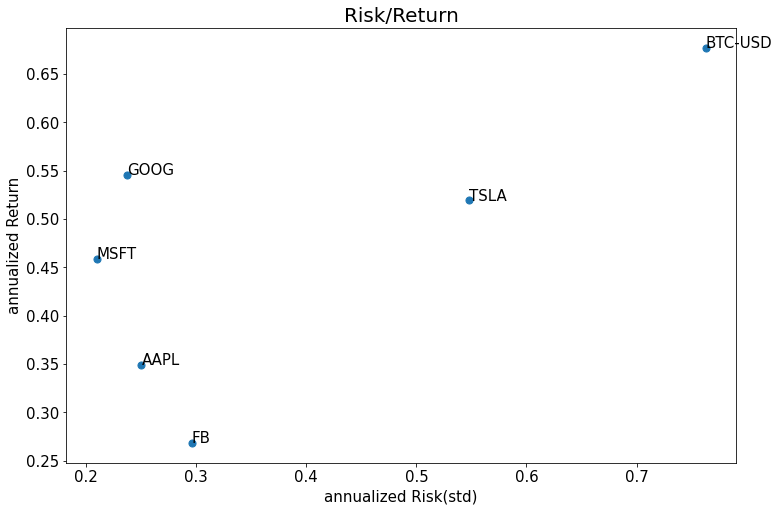

In [125]:
summary.plot(kind = "scatter", x = "std", y = "mean", figsize = (12,8), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "std"], summary.loc[i, "mean"]), size = 15)
plt.xlabel("annualized Risk(std)", fontsize = 15)
plt.ylabel("annualized Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

In [126]:
summary.iplot(kind="scatter" , x="std", y="mean", mode="markers", theme="solar", title="Risk/Return", xTitle="annualized Risk(std)", yTitle="annualized Return")
